# Calibrate distance Source-Detector at SNAP

We will be using Al Bragg edge peaks for this on the Open Beam (OB) data

In [43]:
from PIL import Image
import numpy as np

In [44]:
from pprint import pprint
from ipywidgets import widgets
from ipywidgets.widgets import interact
from IPython.display import display

In [45]:
import matplotlib.image as mpimg

In [46]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [47]:
import glob

In [48]:
%matplotlib notebook

In [49]:
import pyfits

## Setup plot.ly 

In [88]:
from plotly.offline  import plot
from plotly.graph_objs import *
import plotly.tools as lts
from plotly.offline import init_notebook_mode, iplot

In [101]:
import plotly.tools as tls
tls.set_credentials_file(username='jeanbilheux', api_key='pnvcy0lryl')

In [107]:
credentials = tls.get_credentials_file()

In [108]:
print(credentials)

{'username': 'jeanbilheux', 'stream_ids': [], 'proxy_password': '', 'api_key': 'pnvcy0lryl', 'proxy_username': ''}


In [109]:
py.sign_in('jeanbilheux', 'pnvcy0lryl')

In [100]:
init_notebook_mode()

## Load OB data

?? which OB folder to use

In [50]:
# Default folder
default_dir = '/Volumes/Macintosh HD 2/IPTS/BraggEdge/SNAP/OBs_with_VULCAN_Furnace_IN_Place/'
list_data_dir = np.array(['Sum_of_Corrected_OBs'])
full_path_list_data_dir = list(default_dir + folder for folder in list_data_dir)

In [51]:
working_index = 0

In [52]:
data_dir = full_path_list_data_dir[working_index]
print(data_dir)

/Volumes/Macintosh HD 2/IPTS/BraggEdge/SNAP/OBs_with_VULCAN_Furnace_IN_Place/Sum_of_Corrected_OBs


In [55]:
# all *.fits images 
list_fname = glob.glob(data_dir + '/*')
pprint("Number of OBs files: %d" %len(list_fname))

'Number of OBs files: 1482'


Make sure files are sorted the right way !

In [19]:
#pprint(list_fname)
#print()
#pprint("list contains %d files" %(len(list_fname)))

Load images

In [56]:
nbr_data = len(list_fname)
OBs = []

w = widgets.IntProgress()
w.max = nbr_data
display(w)

for _index in range(nbr_data):
        
        _file = list_fname[_index]
        hdu_list = pyfits.open(_file)  # fits
        hdu = hdu_list[0]
        _image = hdu.data
        #_image = Image.open(_file)  # tif
        
        _image = np.asarray(_image)
        OBs.append(_image)

        w.value = _index
    

<IPython.core.display.Javascript object>


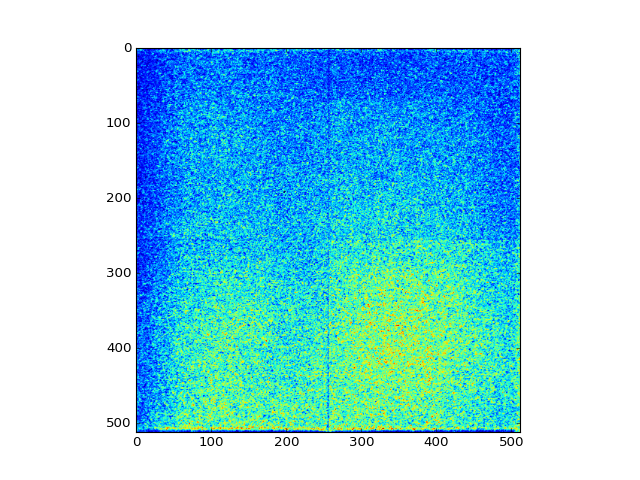

In [112]:
#test display image
fig2 = plt.figure()
plt.imshow(OBs[200])

## Add all counts of each image

In [64]:
nbr_obs = len(OBs)

In [63]:
sum_counts = []
for _image in OBs:
    _sum = np.sum(_image)
    sum_counts.append(_sum)

In [ ]:
# display to check values
fig1 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(range(nbr_obs), sum_counts)

ax_img.set_xlabel("Image Index", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_title("Total Counts ")

In [110]:
py.iplot_mpl(fig1, strip_style = True, filename='ipython/mpl_example')

# Convert 'Image Index' to 'time' 

In [136]:
import sys
sys.path.append('/users/j35/git/braggedge/python')

In [114]:
from neutronbraggedge.experiment_handler import *

In [115]:
import os
tof_spectra_file = os.path.join(default_dir, 'Corrected_OBs_run1_image061/Image061_Spectra.txt')
_tof_handler = TOF(filename = tof_spectra_file)
print("TOF axis size: %d" %len(_tof_handler.tof_array))
print("Number of files: %d" %nbr_obs)

TOF axis size: 1482
Number of files: 1482


In [129]:
layout = Layout(title = "Sum Counts vs TOF")
layout.xaxis['title'] = "TOF (microS)"
layout.yaxis['title'] = "Counts"
trace1 = Scatter(x = _tof_handler.tof_array,
                y = sum_counts,
                mode = 'markers',
                marker = Marker( color = 'red',
                               symbol = 'square'))
data = Data([trace1])
fig = Figure(data=data, layout=layout)
iplot(fig)

# Retrieve Al Bragg edges values 

In [138]:
from neutronbraggedge.braggedge import BraggEdge

In [161]:
_handler = BraggEdge(material='Al', number_of_bragg_edges=4)

In [162]:
_Al_bragg_edges = _handler.bragg_edges
_Al_hkl = _handler.hkl

# Estimate best distance_source_detector 

In [163]:
detector_offset = 4.5e3 #micros

<IPython.core.display.Javascript object>


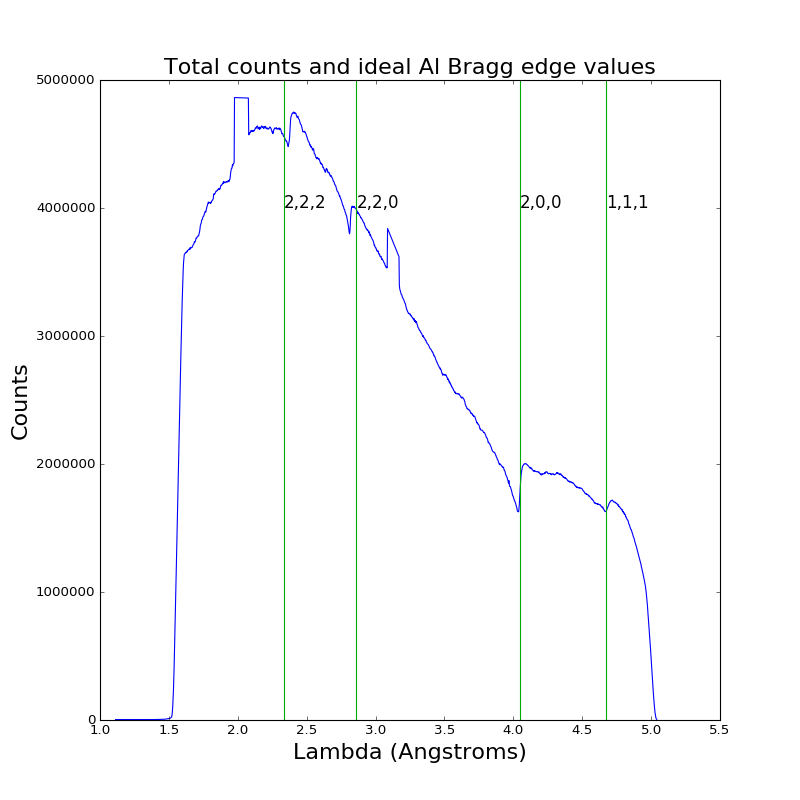

In [164]:
distance_source_detector = 16.0   #m

# initialize tof -> lambda convertor
_exp = Experiment(tof = _tof_handler.tof_array,
                 distance_source_detector_m = distance_source_detector,
                 detector_offset_micros = detector_offset)

# retrieve lambda array
lambda_array_angstroms = _exp.lambda_array * 1e10

# format hkl labels
_hkl_string = []
for _hkl in _Al_hkl:
    _hkl_s = ",".join(str(x) for x in _hkl)
    _hkl_string.append(_hkl_s)

# plot
fig3 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(lambda_array_angstroms, sum_counts)

ax_img.set_xlabel("Lambda (Angstroms)", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_title("Total counts and ideal Al Bragg edge values", fontsize=20)

y_offset = 200
y_value = 4000000
max_x = 6
for _index, _value in enumerate(_Al_bragg_edges):
    if _value > max_x:
        continue
    ax_img.axvline(_value, color="#00aa00", linewidth=1)
    ax_img.text(_value, y_value + ((-1)**_index)*y_offset, _hkl_string[_index], fontsize=15)
    

END OF CURRENT WORK